# Python reminders

- Fonctions numpy courantes
- Applatissement (reshape)
- expliquer le redimensionnement
- python arrays

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Generate some data

Generate 16 batches of 32x32 normalized images (pixels $\in [0, 1]$) with 3 channels (RGB).

In [11]:
batch_size = 16
data = np.random.rand(batch_size, 32, 32, 3, 1).astype(np.float16)

### Check that our images are indeed random

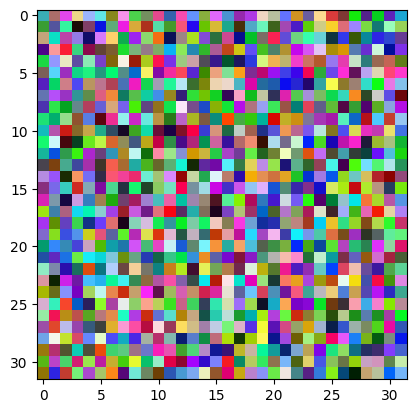

In [12]:
plt.imshow(data[0].astype(np.float32).reshape(32, 32, 3))

## Removing unecessary dimensions

In [13]:
f"We have {len(data)} image of shape {data.shape}"

'We have 16 image of shape (16, 32, 32, 3, 1)'

The `, 1` in the shape adds an unnecessary dimension. We can remove it with `squeeze`.

In [14]:
print(f"Single pixel of an image: {data[0][0][0].shape} -> \n{data[0][0][0]}")
data.squeeze().shape # Just for display, we don't actually modify `data`

Single pixel of an image: (3, 1) -> 
[[0.2299]
 [0.6816]
 [0.712 ]]


(16, 32, 32, 3)

## Reshaping / flattening

Now we want pixels in each image to be in a single row. We can do this with [`reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [15]:
data = data.reshape(16, -1)
# Equivalent to `data.reshape(16, 32 * 32 * 3)`, -1 infers shape

assert data[0].shape[0] == 32 * 32 * 3
data.shape, data

((16, 3072),
 array([[0.2299 , 0.6816 , 0.712  , ..., 0.4556 , 0.713  , 0.9795 ],
        [0.1222 , 0.6753 , 0.7666 , ..., 0.9756 , 0.2976 , 0.804  ],
        [0.838  , 0.3171 , 0.3657 , ..., 0.4985 , 0.7515 , 0.4683 ],
        ...,
        [0.7144 , 0.3901 , 0.4138 , ..., 0.918  , 0.779  , 0.715  ],
        [0.06033, 0.817  , 0.3738 , ..., 0.3677 , 0.7866 , 0.548  ],
        [0.265  , 0.7456 , 0.2761 , ..., 0.2747 , 0.55   , 0.619  ]],
       dtype=float16))

## Keras basic functions

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    
    layers.Dense(1)
])

`keras.Sequential()` returns a `keras.Model` instance. Check its [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model) to check the available functions such as `.compile()` and `.fit()`.

Documentation for:

- [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- [Losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
- [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [18]:
model.compile(
    # Can be a string of a `keras.optimizers` instance
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse", # Same
    metrics=["accuracy"], # Same, but in an array
)